# Experiments Walkthrough

In [1]:
import os
import sys
import pandas as pd
sys.path.insert(0, os.path.abspath('..'))

%load_ext autoreload
%autoreload 2

%cd /Users/steed/caliskan/git/learning-appearance-bias

/Users/steed/caliskan/git/learning-appearance-bias


Note that A & B write to the same files, so conduct analysis and export results after running each.

## A: Train on Both

In [2]:
# WARNING: removes any cached models - fresh start for this session
%rm models/*.pkl

In [ ]:
from appearance_bias.api import regress_all, regress_single

regress_all(image_dirs=["data/maxdistinct_aligned", "data/random_aligned"], cross_validate=True, test_random=False)

Generating Attractive regressor
Extracting training features for data/maxdistinct_aligned...
Extracting labels for data/maxdistinct_aligned...
Extracting training features for data/random_aligned...
Extracting labels for data/random_aligned...
Cross validating...
MSE: 0.939461 (+/- 0.007609)
1/5
2/5
3/5
4/5
5/5
Generating Competent regressor
Extracting training features for data/maxdistinct_aligned...
Extracting labels for data/maxdistinct_aligned...
Extracting training features for data/random_aligned...
Extracting labels for data/random_aligned...
Cross validating...
MSE: 0.936764 (+/- 0.012105)
1/5


## B: Train on Max Distinct

In [8]:
# WARNING: removes any cached models - fresh start for this session
%rm models/*.pkl

Generating Attractive regressor
Extracting training features for data/maxdistinct_aligned...
Extracting labels for data/maxdistinct_aligned...
Cross validating...
Generating predictions for a test on 300 Random Faces
Exported predictions to CSV
- Random Faces
 rho=0.2967 p=0.0000
MSE: 0.974398 (+/- 0.003523)
1/5
2/5
3/5
4/5
5/5
Pearson coeff by source
- Random Faces
 rho=0.2967 p=0.0000
- Maximally Distinct
 rho=0.9891 p=0.0000
Pearson coeff by source
- Random Faces
 rho=0.2967 p=0.0000
- Maximally Distinct
 rho=0.9891 p=0.0000
Pearson coeff by source
- Random Faces
 rho=0.2967 p=0.0000
- Maximally Distinct
 rho=0.9891 p=0.0000
Generating Competent regressor
Extracting training features for data/maxdistinct_aligned...
Extracting labels for data/maxdistinct_aligned...
Cross validating...
Generating predictions for a test on 300 Random Faces
Exported predictions to CSV
- Random Faces
 rho=0.2878 p=0.0000
MSE: 0.970553 (+/- 0.002652)
1/5
2/5
3/5
4/5
5/5
Pearson coeff by source
- Random Fa

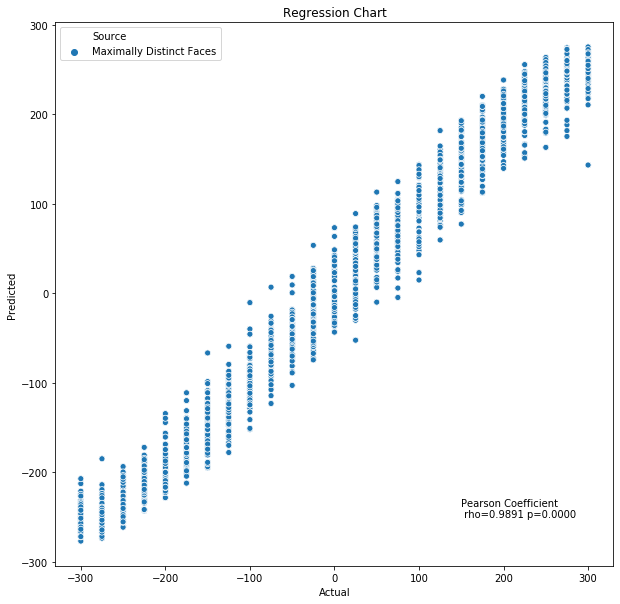

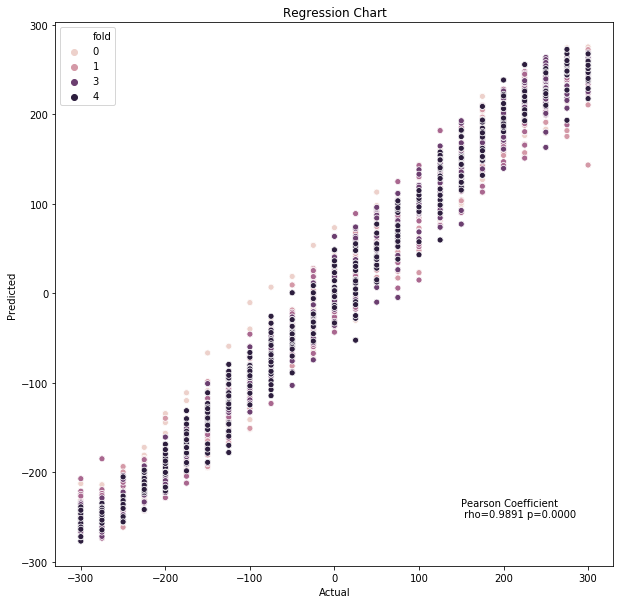

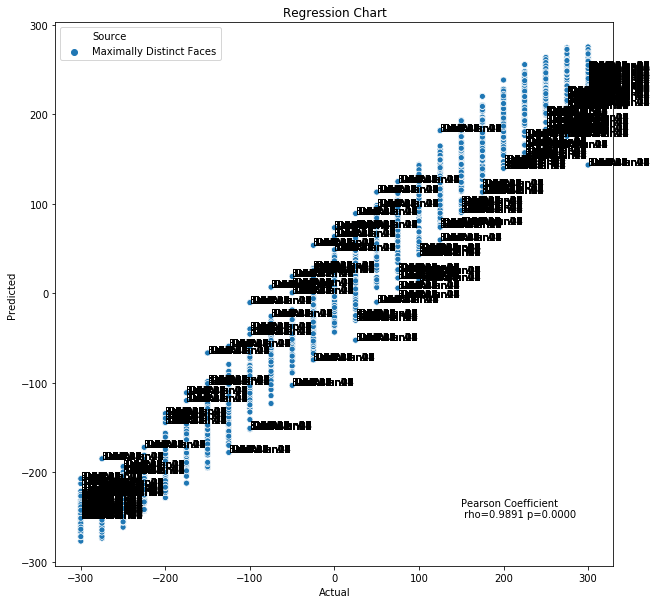

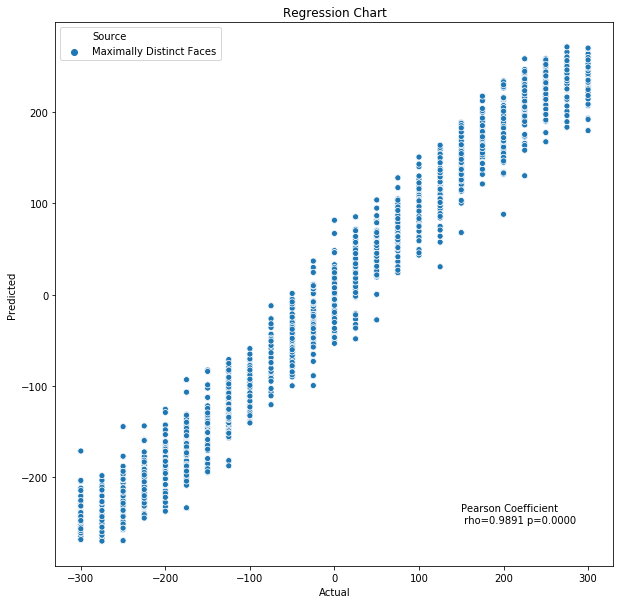

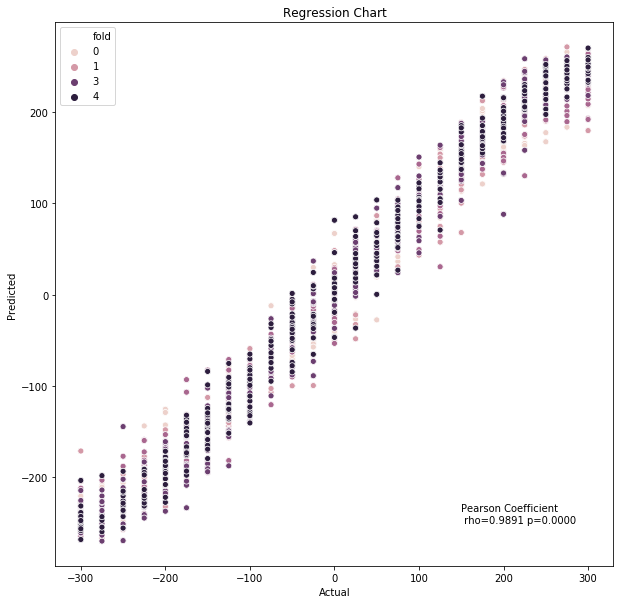

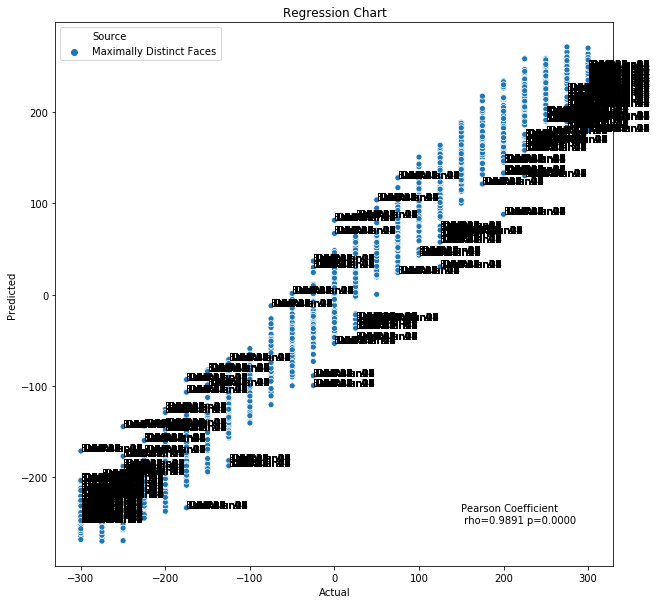

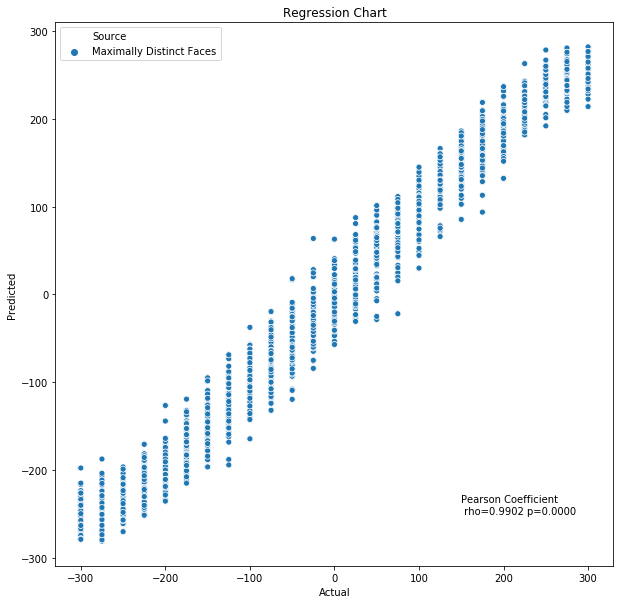

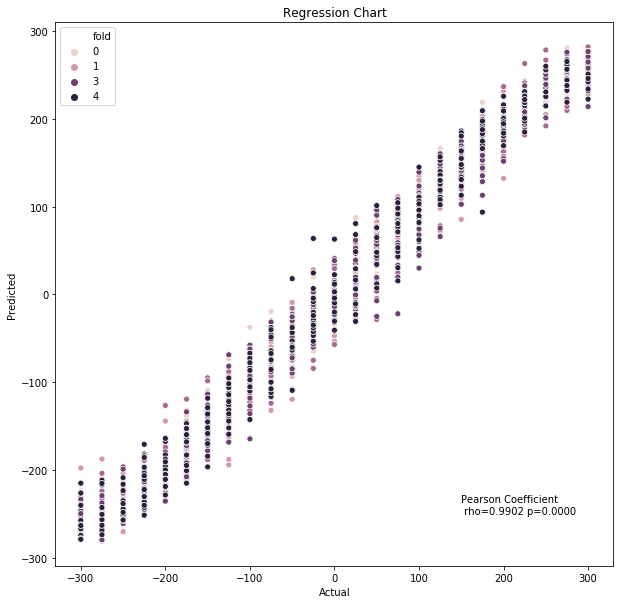

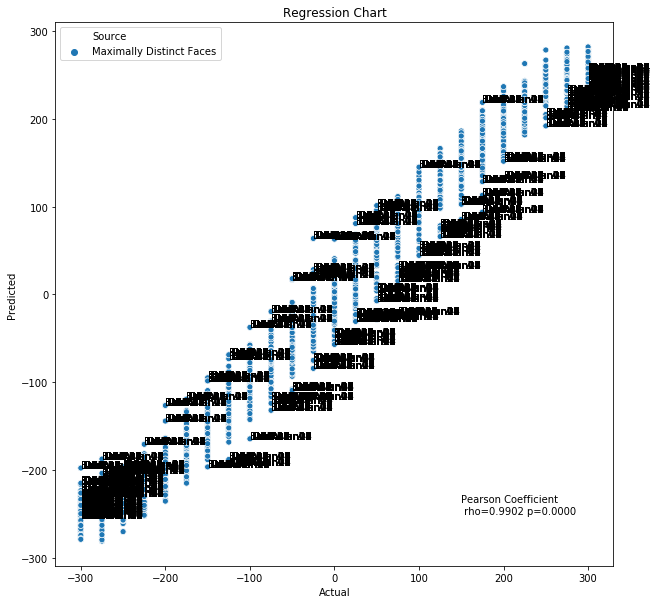

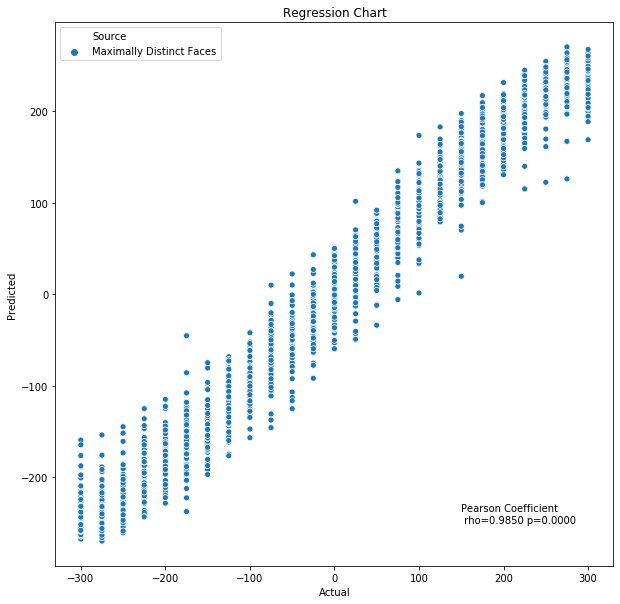

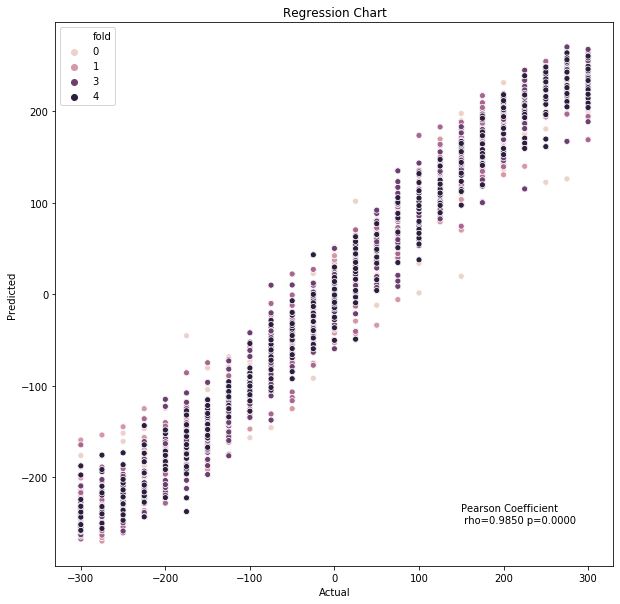

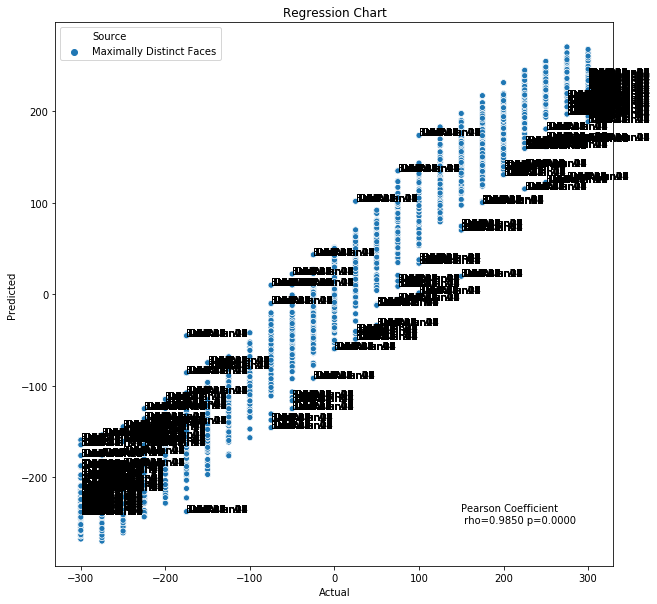

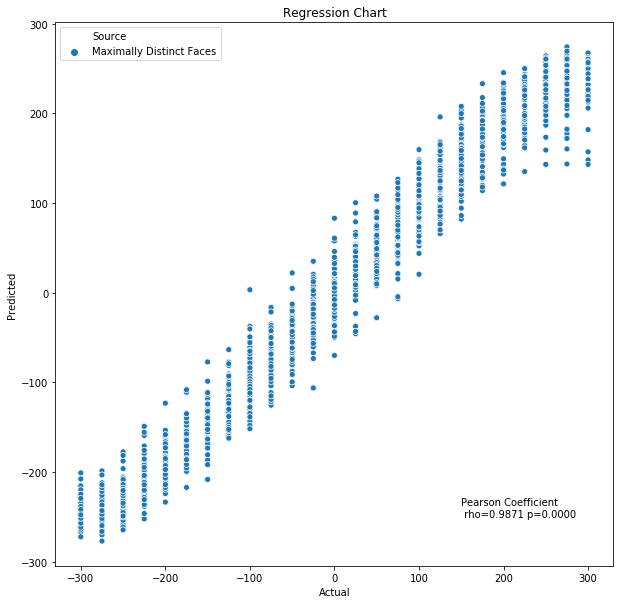

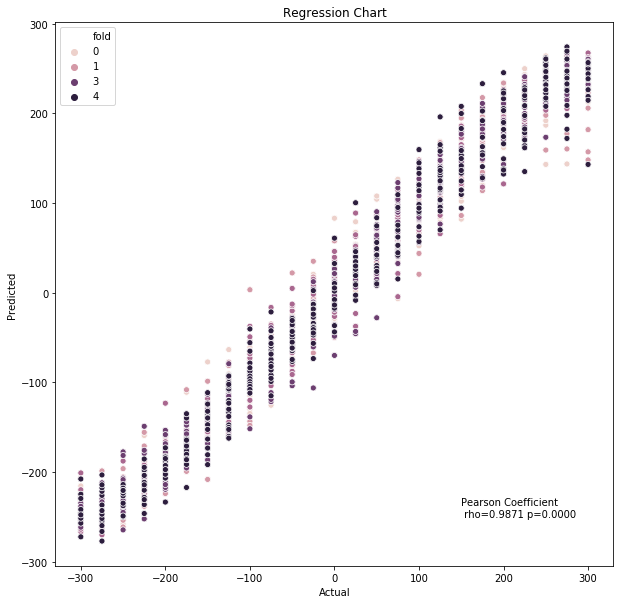

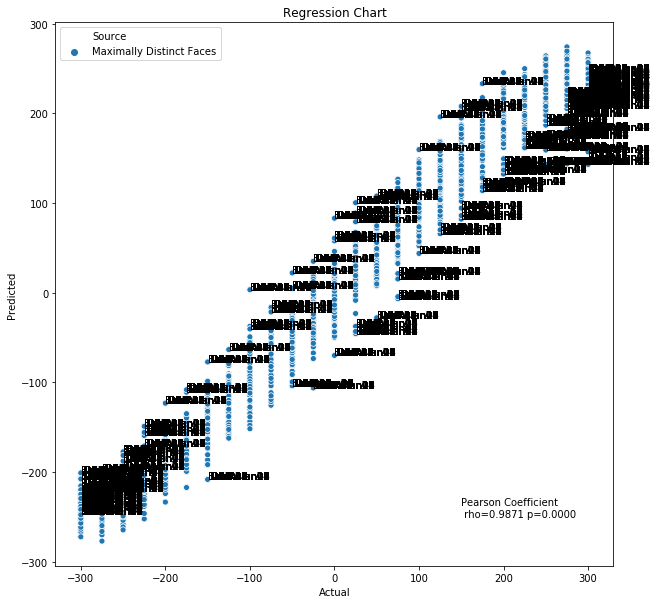

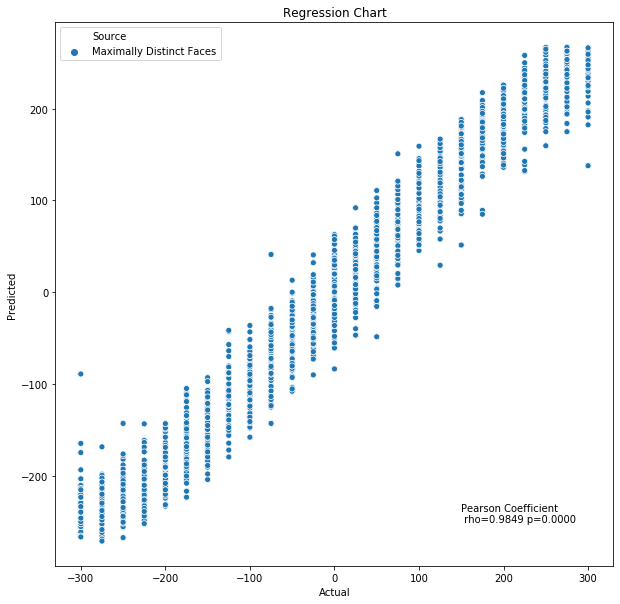

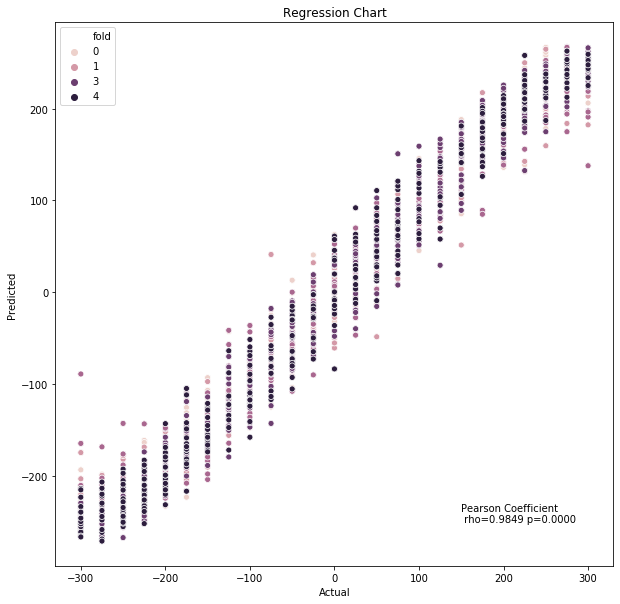

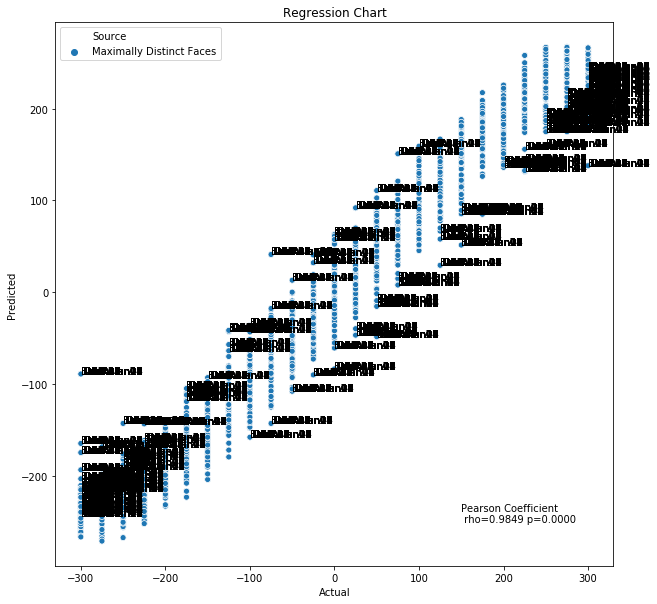

In [9]:
regress_all(image_dirs=["data/maxdistinct_aligned"], cross_validate=True)

## C: Election Outcomes

In [ ]:
regress_all(image_dirs=["data/maxdistinct_aligned"], test_dir="data/politicians-database_aligned")

### Error Analysis

In [ ]:
results = pd.read_csv("output/preds/preds-politicians_election-results.csv", index_col=0)
preds = pd.read_csv("output/preds/politicians-database_aligned-preds_all.csv", index_col=0)
results

## Nationality Bias

In [ ]:
regress_all(image_dirs=["data/maxdistinct_aligned"], test_dir="data/average-faces")

## Race Bias

In [ ]:
regress_all(image_dirs=["data/maxdistinct_aligned"], test_dir="data/people_all_aligned")

## Occupation/Gender Bias

In [ ]:
regress_all(image_dirs=["data/maxdistinct_aligned"], test_dir="data/occupations_aligned")

Analyze all of these predictions with `scripts/plot_preds.R`.